In [4]:
# Import Splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.46M/6.46M [00:00<00:00, 25.3MB/s]


In [6]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

html = browser.html
html_soup = soup(html, 'html.parser')

In [7]:
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [8]:
df = df[0]
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [10]:
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [12]:
mars_max = df.max()
mars_max

id                                 1895
terrestrial_date    2018-02-27 00:00:00
sol                                1977
ls                                  359
month                                12
min_temp                          -62.0
pressure                          925.0
dtype: object

In [13]:
mars_min = df.min()
mars_min

id                                    2
terrestrial_date    2012-08-16 00:00:00
sol                                  10
ls                                    0
month                                 1
min_temp                          -90.0
pressure                          727.0
dtype: object

In [14]:
## 12 months exist on Mars as per the maximum month
## 1977 sols (Martian days) exist in the dataset as per the maximum sols

In [15]:
month_temp = df.drop(['id','terrestrial_date','sol','ls','pressure'],axis=1)
month_temp

,month,min_temp
0,6,-75.0
1,6,-76.0
2,6,-76.0
3,6,-74.0
4,6,-74.0
...,...,...
1862,5,-78.0
1863,5,-77.0
1864,5,-76.0
1865,5,-77.0


In [16]:
mars_temp = month_temp.groupby(['month']).mean()
mars_temp.head(10)

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


Text(0, 0.5, 'Temperature on Mars')

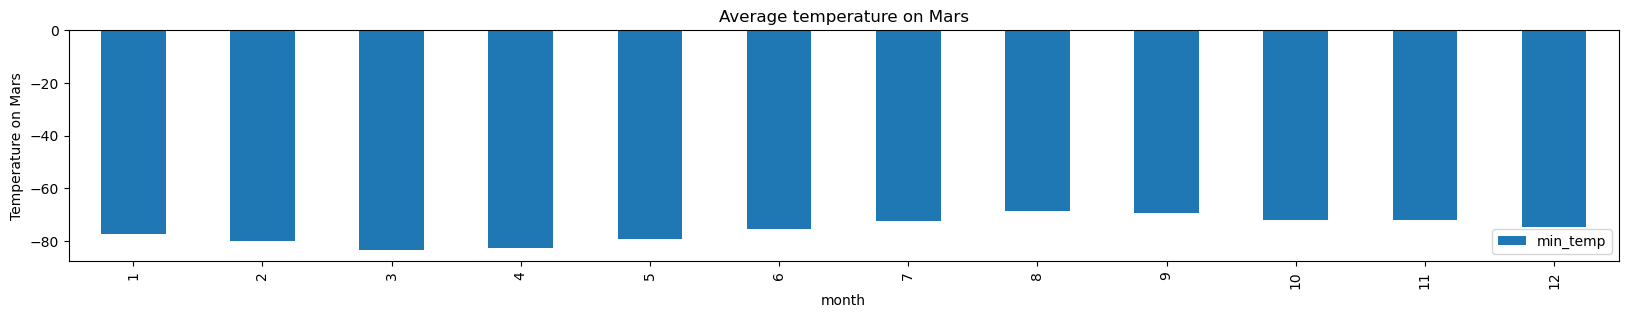

In [52]:
mars_temp.plot(kind="bar", figsize=(20,3))
plt.title("Average temperature on Mars")
plt.ylabel("Temperature on Mars")

In [18]:
month_pressure = df.drop(['id','terrestrial_date','sol','ls','min_temp'], axis=1)
month_pressure

,month,pressure
0,6,739.0
1,6,740.0
2,6,741.0
3,6,732.0
4,6,740.0
...,...,...
1862,5,730.0
1863,5,729.0
1864,5,729.0
1865,5,728.0


In [19]:
mars_pressure = month_pressure.groupby(['month']).mean()
mars_pressure.head(10)

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


Text(0, 0.5, 'Pressure on Mars')

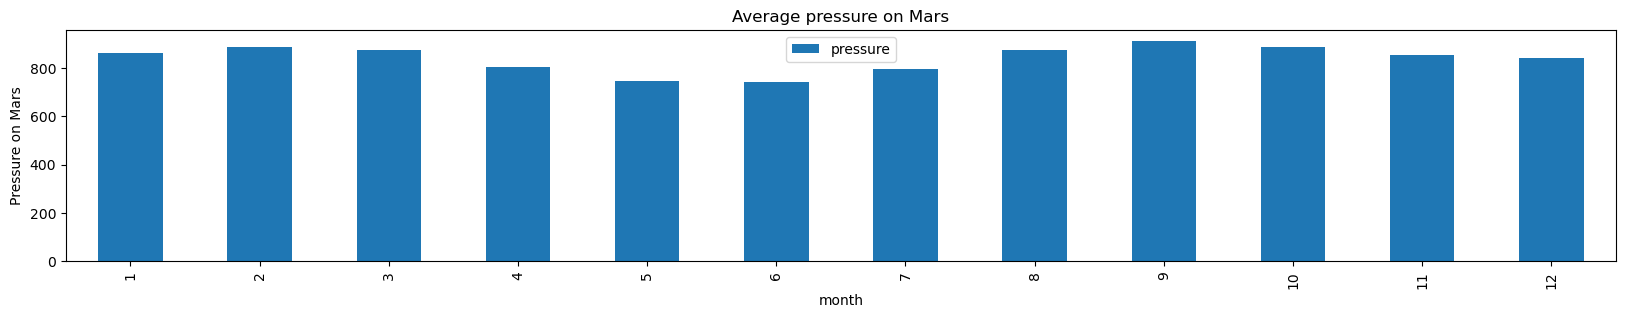

In [20]:
mars_pressure.plot(kind="bar", figsize=(20,3))
plt.title("Average pressure on Mars")
plt.ylabel("Pressure on Mars")

In [48]:
mars_years = df.drop(['id','sol','ls','month','pressure'], axis=1)
mars_years = mars_years.set_index('terrestrial_date')
mars_years

,min_temp
terrestrial_date,
2012-08-16,-75.0
2012-08-17,-76.0
2012-08-18,-76.0
2012-08-19,-74.0
2012-08-20,-74.0
...,...
2018-02-23,-78.0
2018-02-24,-77.0
2018-02-25,-76.0


Text(0, 0.5, 'Temperature on Mars')

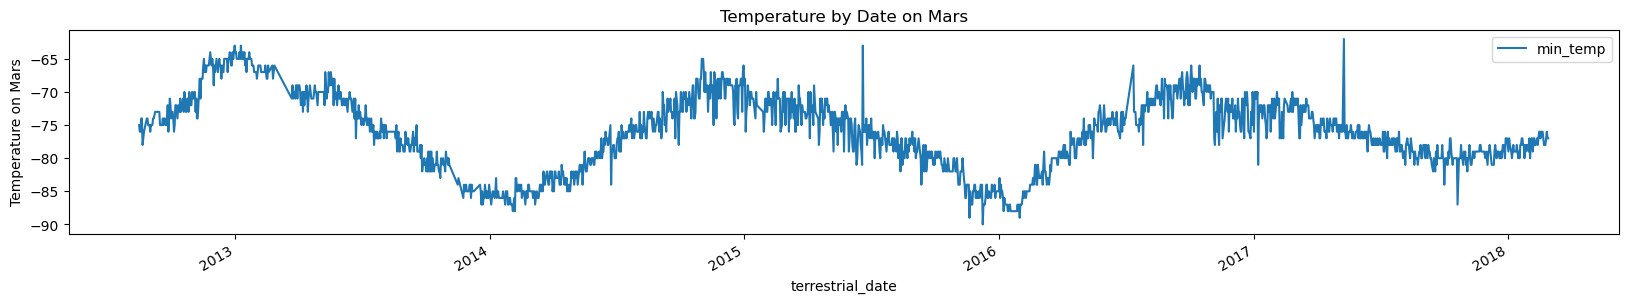

In [51]:
mars_years.plot(kind="line", figsize=(20,3))
plt.title("Temperature by Date on Mars")
plt.ylabel("Temperature on Mars")

## One year on Mars is approximately 2 years (730 days) on Earth as per the line chart below. 
## We can estimate the length of one year on Mars based on the peak of the temperature as summer on Mars, and one full cycle being approximately 2 years

In [53]:
df.to_csv('mars.csv',index=False)